## Random Forest Classification

### Loading data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']
cols=['sepal length', 'sepal width', 'target']
iris=iris[cols]

def plot_clf(clf):
  n_grid_x=200
  ms=0.5
  plt.figure(figsize=(10, 6))

  mask_0=iris['target']==0
  mask_1=iris['target']==1
  mask_2=iris['target']==2

  plt.plot(iris.loc[mask_0, 'sepal length'], iris.loc[mask_0, 'sepal width'], 'o', color='gold', label='setosa')
  plt.plot(iris.loc[mask_1, 'sepal length'], iris.loc[mask_1, 'sepal width'], 's', color='blue', label='versicolor')
  plt.plot(iris.loc[mask_2, 'sepal length'], iris.loc[mask_2, 'sepal width'], '^', color='green', label='virginica')

  x_min = plt.gca().get_xlim()[0]
  x_max = plt.gca().get_xlim()[1]
  y_min = plt.gca().get_ylim()[0]
  y_max = plt.gca().get_ylim()[1]

  x1 = np.linspace(x_min, x_max, n_grid_x)
  # The number of grid point along the vertical axis
  # is adjusted to have the same horizontal and vertical
  # spacing between the grid points 
  n_grid_y=int(n_grid_x*y_max/x_max)
  x2 = np.linspace(y_min, y_max, n_grid_y)

  # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
  x1, x2 = np.meshgrid(x1, x2)
  x1 = x1.reshape(n_grid_x*n_grid_y, -1)
  x2 = x2.reshape(n_grid_x*n_grid_y, -1)

  x_grid=np.hstack((x1, x2))

  y_grid = clf.predict(x_grid)

  plt.plot(x1[y_grid==0], x2[y_grid==0], 'o', color='yellow', ms=ms)
  plt.plot(x1[y_grid==1], x2[y_grid==1], 'o', color='deepskyblue', ms=ms)
  plt.plot(x1[y_grid==2], x2[y_grid==2], 'o', color='limegreen', ms=ms)

  plt.xlabel("Sepal length, cm", fontsize=14)
  plt.ylabel("Sepal width, cm", fontsize=14)
  plt.legend(#loc='lower right', 
            fontsize=11)
  plt.show()

iris.head()

,sepal length,sepal width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


### Motivation

If left unconstrained Decesion Trees can easily overfit the data. Iris example:

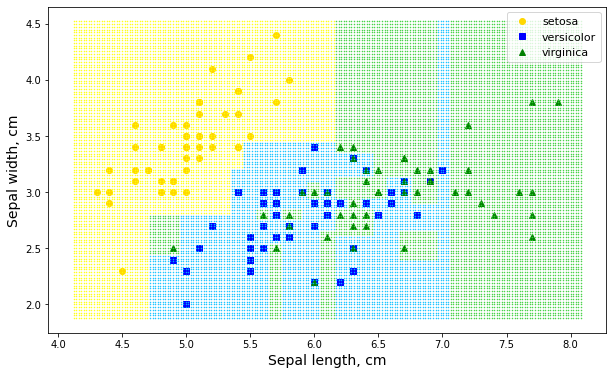

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#
from sklearn.tree import DecisionTreeClassifier

X=iris.iloc[:, :-1].values
y=iris.iloc[:, -1]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

plot_clf(tree)

We can try to regularize the classifire by increasing the mininum number of samples per leaf.

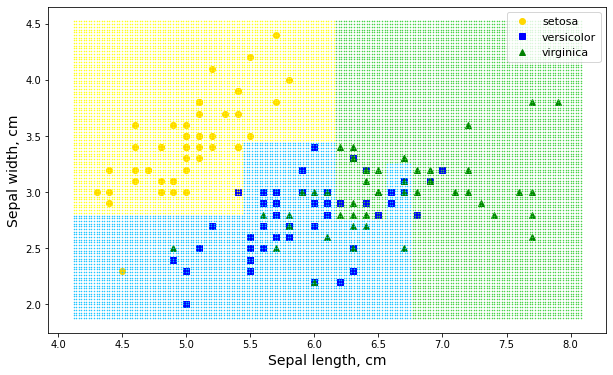

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree.fit(X, y)

plot_clf(tree)

It looks better but clearly, there is still some room for imporovement (for example, why did the setosa data point ended up in the region of the versicolor class?)

### Bagging and Pasting

Idea: build multiple models using slightly different subsets of the data. Then average out the predictions of these models using either the most common class prediction (*hard voting*) or averaging class probabilities (*soft voting*). The latter usually works better. So, instead of relying on a single decision tree we utilize predictions made by a large number of such trees -- we no longer want to grow just a single tree but the whole *forest* of them! The technique of using predictions of multiple machine learning models is often called *ensemble learning*.

To chose the subsets of data we can either sample the data with or without replacements. The former is called *pasting* and the latter *bagging*.

In the Scikit-Learn library there is a special class `sklearn.ensemble.BaggingClassifier()` that allows you to perform either bagging or pasting with any classifier (not just with Descision Trees). The textbook includes some examples illustrtating how this classifier works and you are encourage to take a look at them. We won't be using it in our class because we will be using the `RandomForestClassifier()` instead.

### Random Forest Classifier

Idea: instead of (or in addition to) sampling instances sample random subsets of features. It turns out that implementation of this idea leads to a very dramatic improvement of the Decsision Trees prediciton. The algorithm is called *Random Forest* and nowadays, it is a very practical, powerful, and popular algorithm. For example, Microsoft is using Random Forest algorithms for the Kinect motion sensing device used with their Xbox gaming platform: here is the [article](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/BodyPartRecognition.pdf).

Example:

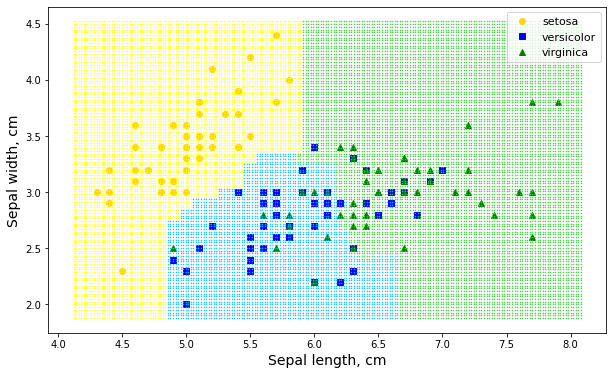

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

X=iris.iloc[:, :-1].values
y=iris.iloc[:, -1]

rf = RandomForestClassifier(min_samples_leaf=5, random_state=42)
rf.fit(X, y)

plot_clf(rf)

### Random Forest Regressor

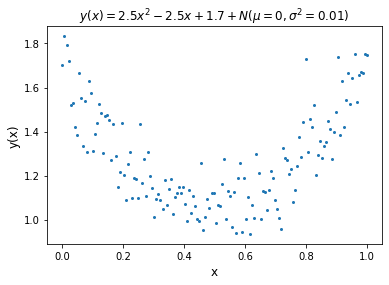

In [ ]:
n=150
sc=0.1
a=2.5
b=-2.5
c=1.7

X=np.linspace(0, 1, n)
y=a*X**2+b*X+c+np.random.normal(loc=0, scale=sc, size=n)

X=X.reshape(-1, 1)

plt.plot(X, y, 'o', ms=2)
plt.title(r"$y(x) = 2.5 x^2 - 2.5 x + 1.7 + N(\mu=0, \sigma^2=0.01)$")
plt.xlabel('x', fontsize=12)
plt.ylabel('y(x)', fontsize=12)
plt.show()

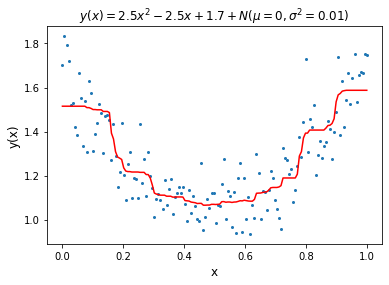

In [ ]:
from sklearn.ensemble import RandomForestRegressor

plt.plot(X, y, 'o', ms=2)

reg=RandomForestRegressor(min_samples_leaf=10)
reg.fit(X, y)
y_pred=reg.predict(X)
plt.plot(X, y_pred, '-', color='red')
plt.title(r"$y(x) = 2.5 x^2 - 2.5 x + 1.7 + N(\mu=0, \sigma^2=0.01)$")
plt.xlabel('x', fontsize=12)
plt.ylabel('y(x)', fontsize=12)
plt.show()